In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [11]:
plt.style.use('seaborn-v0_8')

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

## Load Datasets

In [14]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


<Axes: xlabel='age', ylabel='Count'>

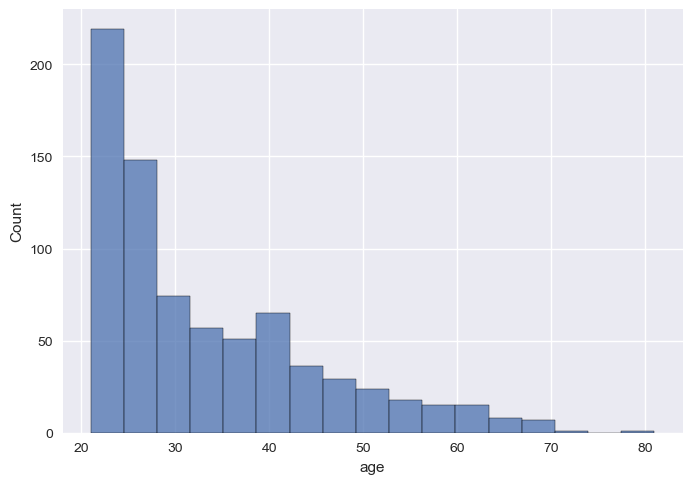

In [15]:
sns.histplot(df_diabetes['age'])

In [ ]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [ ]:
features = df_diabetes.values[:,:8]

In [ ]:
print(features)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
labels = df_diabetes.values[:,8:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

## Define Model

In [ ]:
# define the keras sequential model
model = Sequential()

In [ ]:
# Artificial Neural Network / Multi-layer Perceptron / Fully Connected Neural Network

# Convolutional Neural Network -> data gambar

# Long-Short Term Memory Neural Network -> data squentian atau data teks

Dll...


In [ ]:
model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

**Question:** Arsitektur di atas termasuk MLP atau perceptron?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

optmizer **Adam**


## Train Model

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 1s 2ms/step - loss: 6.8180 - accuracy: 0.6059
Epoch 2/250
77/77 [==============================] - 0s 2ms/step - loss: 1.4004 - accuracy: 0.6254
Epoch 3/250
77/77 [==============================] - 0s 2ms/step - loss: 1.1648 - accuracy: 0.6336
Epoch 4/250
77/77 [==============================] - 0s 2ms/step - loss: 0.8789 - accuracy: 0.6710
Epoch 5/250
77/77 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.6678
Epoch 6/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6759
Epoch 7/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6792
Epoch 8/250
77/77 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.6417
Epoch 9/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6775
Epoch 10/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6873
Epoch 11/

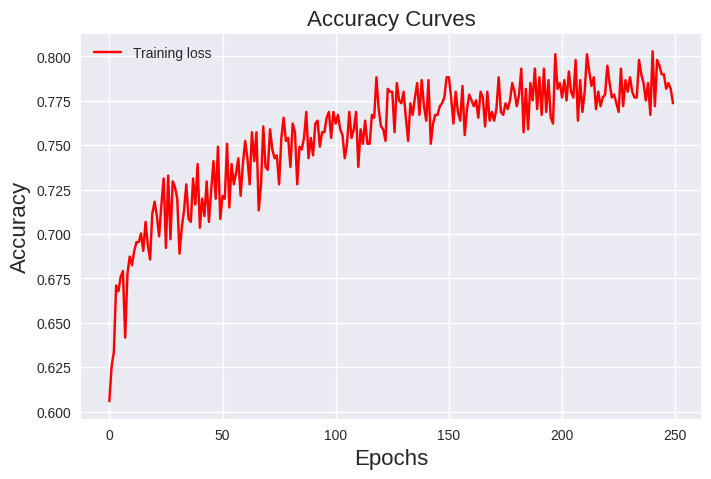

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 67.53


---